In [1]:
from data_pipeline import *
from model import *
import tensorflow as tf
import datetime
from constants import *

In [2]:
train_generator, valid_generator = get_data_generators(DATA_DIR, IMAGE_SIZE, BATCH_SIZE)

Found 551 validated image filenames belonging to 3 classes.
Found 1288 validated image filenames belonging to 3 classes.


In [3]:
model = resnet_model(input_shape=INPUT_SHAPE, num_classes = len(train_generator.class_indices))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 2048)              23564800  
_________________________________________________________________
last_dense (Dense)           (None, 3)                 6147      
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 23,570,947
Trainable params: 6,147
Non-trainable params: 23,564,800
_________________________________________________________________


In [5]:
conv_base = model.layers[0]
for i in range(-8,0):
    conv_base.layers[i].trainable = True

In [6]:
learning_rate = 1e-3
model.compile(
  #optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9), 
  optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate), 
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

In [7]:
log_path = LOG_DIR + 'resnet50v2_retrain_8layers_lr_1e-3' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_path, histogram_freq=1)

In [8]:
checkpoint_kwargs = dict(monitor='loss', verbose=1, save_best_only=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(MODEL_CHECKPOINT_DIR+'resnet50v2_retrain_8layers_lr_1e-3.hdf5', **checkpoint_kwargs)

In [9]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = valid_generator.samples // valid_generator.batch_size

fit_kwargs = dict(steps_per_epoch=steps_per_epoch, epochs=30, validation_steps=validation_steps, 
                  validation_data=valid_generator, verbose=1, callbacks = [tensorboard_callback, model_checkpoint])

In [10]:
out = model.fit(train_generator, **fit_kwargs)

Epoch 1/30
 1/40 [..............................] - ETA: 0s - loss: 1.1090 - accuracy: 0.3750WARNING:tensorflow:From /home/rocky/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
40/40 [==============================] - ETA: 0s - loss: 0.7648 - accuracy: 0.6505
Epoch 00001: loss improved from inf to 0.76482, saving model to ./model_checkpoints/resnet50v2_retrain_8layers_lr_1e-3.hdf5
40/40 [==============================] - 10s 250ms/step - loss: 0.7648 - accuracy: 0.6505 - val_loss: 0.6681 - val_accuracy: 0.7279
Epoch 2/30
40/40 [==============================] - ETA: 0s - loss: 0.5939 - accuracy: 0.7523
Epoch 00002: loss improved from 0.76482 to 0.59391, saving model to ./model_checkpoints/resnet50v2_retrain_8layers_lr_1e-3.hdf5
40/40 [==============================] - 9s 230m

Epoch 25/30
40/40 [==============================] - ETA: 0s - loss: 0.3538 - accuracy: 0.9180
Epoch 00025: loss did not improve from 0.34169
40/40 [==============================] - 9s 219ms/step - loss: 0.3538 - accuracy: 0.9180 - val_loss: 0.5071 - val_accuracy: 0.8235
Epoch 26/30
40/40 [==============================] - ETA: 0s - loss: 0.3498 - accuracy: 0.9204
Epoch 00026: loss did not improve from 0.34169
40/40 [==============================] - 9s 218ms/step - loss: 0.3498 - accuracy: 0.9204 - val_loss: 0.5010 - val_accuracy: 0.8162
Epoch 27/30
39/40 [============================>.] - ETA: 0s - loss: 0.3474 - accuracy: 0.9151
Epoch 00027: loss did not improve from 0.34169
40/40 [==============================] - 9s 219ms/step - loss: 0.3485 - accuracy: 0.9140 - val_loss: 0.5248 - val_accuracy: 0.7996
Epoch 28/30
40/40 [==============================] - ETA: 0s - loss: 0.3458 - accuracy: 0.9196
Epoch 00028: loss did not improve from 0.34169
40/40 [==============================] 

In [11]:
model.save(MODEL_CHECKPOINT_DIR+'resnet50v2_retrain_8layers_lr_1e-3')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./model_checkpoints/resnet50v2_retrain_8layers_lr_1e-3/assets


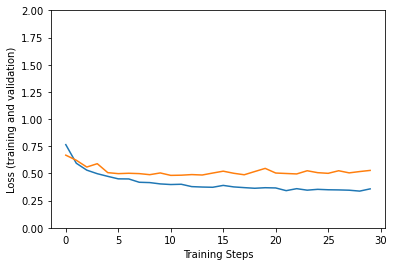

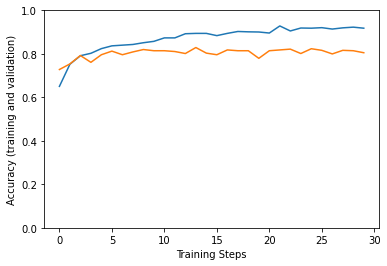

In [13]:
import matplotlib.pyplot as plt
hist = out.history
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
